# 画像のクラス分類

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


## データセットの読み込み

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
train, test = mnist.load_data()

In [7]:
type(train) 
#>>tuple:書き換え不能なリスト

tuple

In [9]:
train[1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
train[1].shape

(60000,)

In [13]:
test[1].shape

(10000,)

- trainはlength2のタプル
- train[0]には60000サンプルの画像が入っている
- train[1]には60000サンプルのラベル
- test[0]には10000サンプルの画像
- test[1]には10000サンプルのラベル

In [14]:
type(train[0])

numpy.ndarray

In [16]:
train[0][0].shape # 0行0列の画像の大きさ28*28

(28, 28)

In [17]:
train[0].dtype

dtype('uint8')

In [22]:
# 後ほど画像の整形をする必要がある
img = train[0][0]

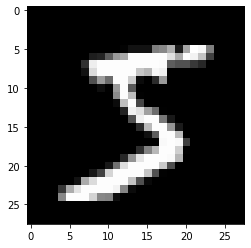

In [27]:
plt.gray()
plt.imshow(img)

In [29]:
#入力データxに関して
train_x = train[0].reshape(60000, 28, 28, 1) / 255 # 正規化
test_x = test[0].reshape(10000, 28, 28, 1) / 255 # 正規化

In [30]:
# 教師データt
train_t = train[1]
test_t = test[1]

In [31]:
train_x[1].shape

(28, 28, 1)

## CNNモデルの定義

In [32]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [42]:
from tensorflow.keras import models, layers

#シードの固定
reset_seed(0)

#モデルのインスタンス化
model = models.Sequential()

#モデルの構築
model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(28, 28, 1)))# (目、耳、鼻とかのセット数(3, 3)中間層の数っぽい)
#input_shape = 入力のサイズ28*28*1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #畳み込み槽から全結合層につなぐ時には必ず入れる
model.add(layers.Dense(10, activation='softmax')) #出力層

#optimizerの設定
optimizer = keras.optimizers.Adam(lr=0.01)
#モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [44]:
# 学習の詳細設定
batch_size = 4096
epochs = 30

history = model.fit(train_x, train_t, 
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(test_x, test_t))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 24s 406us/sample - loss: 1.2094 - accuracy: 0.6629 - val_loss: 0.4912 - val_accuracy: 0.8520
Epoch 2/30
60000/60000 [==============================] - 0s 7us/sample - loss: 0.4374 - accuracy: 0.8662 - val_loss: 0.3546 - val_accuracy: 0.8984
Epoch 3/30
60000/60000 [==============================] - 0s 7us/sample - loss: 0.3402 - accuracy: 0.8989 - val_loss: 0.3012 - val_accuracy: 0.9128
Epoch 4/30
60000/60000 [==============================] - 0s 7us/sample - loss: 0.2980 - accuracy: 0.9129 - val_loss: 0.2705 - val_accuracy: 0.9215
Epoch 5/30
60000/60000 [==============================] - 0s 7us/sample - loss: 0.2730 - accuracy: 0.9197 - val_loss: 0.2478 - val_accuracy: 0.9264
Epoch 6/30
60000/60000 [==============================] - 0s 7us/sample - loss: 0.2509 - accuracy: 0.9265 - val_loss: 0.2311 - val_accuracy: 0.9307
Epoch 7/30
60000/60000 [==============================] - 0

In [45]:
type(history.history)

dict

In [46]:
results = pd.DataFrame(history.history)

In [47]:
results

,loss,accuracy,val_loss,val_accuracy
0,1.209383,0.662850,0.491177,0.8520
1,0.437441,0.866233,0.354573,0.8984
2,0.340236,0.898883,0.301199,0.9128
3,0.298017,0.912883,0.270476,0.9215
4,0.272989,0.919667,0.247761,0.9264
5,0.250903,0.926550,0.231058,0.9307
6,0.233299,0.931667,0.218231,0.9349
7,0.217966,0.936583,0.209138,0.9383
8,0.205881,0.940167,0.196030,0.9412
9,0.193541,0.942750,0.191474,0.9418


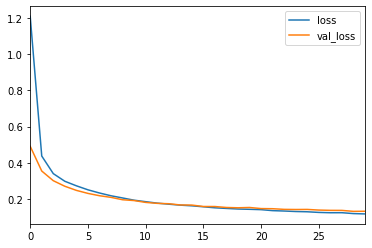

In [48]:
# loss（損失関数）を表示
graph = results[['loss', 'val_loss']].plot()
# graph.set_xlim([0,40])
# graph.set_ylim([80,100])